In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn import model_selection
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score,accuracy_score
from sklearn.ensemble import ExtraTreesRegressor,GradientBoostingClassifier, RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.model_selection import KFold
from xgboost import XGBClassifier
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
import seaborn as sns; sns.set(style="ticks", color_codes=True)
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV


import os
from google.colab import drive

In [ ]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
os.listdir('/content/gdrive/My Drive/big data project')


['test.csv', 'train.csv', 'sampleSubmission.csv', 'stores.csv', 'features.csv']

In [ ]:
train = pd.read_csv ('/content/gdrive/My Drive/big data project/train.csv')
train.shape

(421570, 5)

In [ ]:
train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


In [ ]:
test = pd.read_csv ('/content/gdrive/My Drive/big data project/test.csv')
test.shape

(115064, 4)

In [ ]:
test.head()

,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False
3,1,1,2012-11-23,True
4,1,1,2012-11-30,False


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115064 entries, 0 to 115063
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Store      115064 non-null  int64 
 1   Dept       115064 non-null  int64 
 2   Date       115064 non-null  object
 3   IsHoliday  115064 non-null  bool  
dtypes: bool(1), int64(2), object(1)
memory usage: 2.7+ MB


In [ ]:
sampleSubmission = pd.read_csv ('/content/gdrive/My Drive/big data project/sampleSubmission.csv')
sampleSubmission.shape

(115064, 2)

In [ ]:
sampleSubmission.head()

,Id,Weekly_Sales
0,1_1_2012-11-02,0
1,1_1_2012-11-09,0
2,1_1_2012-11-16,0
3,1_1_2012-11-23,0
4,1_1_2012-11-30,0


In [ ]:
stores = pd.read_csv ('/content/gdrive/My Drive/big data project/stores.csv')
stores.shape

(45, 3)

In [ ]:
stores.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [ ]:
stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Store   45 non-null     int64 
 1   Type    45 non-null     object
 2   Size    45 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ KB


In [ ]:
features = pd.read_csv ('/content/gdrive/My Drive/big data project/features.csv')
features.shape

(8190, 12)

In [ ]:
features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [ ]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB


In [ ]:
############################# 	Data Preprocessing #############################

In [ ]:
###############  Data Preprocessing: A) compining data 

In [ ]:
trainset = train.merge(stores, how='left').merge(features, how='left')
trainset.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
1,1,1,2010-02-12,46039.49,True,A,151315,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106
2,1,1,2010-02-19,41595.55,False,A,151315,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106
3,1,1,2010-02-26,19403.54,False,A,151315,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106
4,1,1,2010-03-05,21827.90,False,A,151315,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106


In [ ]:
testset = test.merge(stores, how='left').merge(features, how='left')
testset.head()

,Store,Dept,Date,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2012-11-02,False,A,151315,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573
1,1,1,2012-11-09,False,A,151315,61.24,3.314,11421.32,3370.89,40.28,4646.79,6154.16,223.481307,6.573
2,1,1,2012-11-16,False,A,151315,52.92,3.252,9696.28,292.10,103.78,1133.15,6612.69,223.512911,6.573
3,1,1,2012-11-23,True,A,151315,56.23,3.211,883.59,4.17,74910.32,209.91,303.32,223.561947,6.573
4,1,1,2012-11-30,False,A,151315,52.34,3.207,2460.03,NaN,3838.35,150.57,6966.34,223.610984,6.573


In [ ]:
trainset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
 5   Type          421570 non-null  object 
 6   Size          421570 non-null  int64  
 7   Temperature   421570 non-null  float64
 8   Fuel_Price    421570 non-null  float64
 9   MarkDown1     150681 non-null  float64
 10  MarkDown2     111248 non-null  float64
 11  MarkDown3     137091 non-null  float64
 12  MarkDown4     134967 non-null  float64
 13  MarkDown5     151432 non-null  float64
 14  CPI           421570 non-null  float64
 15  Unemployment  421570 non-null  float64
dtypes: bool(1), float64(10), int64(3), object(2)
memory usage: 51.9+ MB


In [ ]:
###############  Data Preprocessing:  B) Types of data

In [ ]:
# find Numerical 
numeric_columns=trainset.select_dtypes(include=np.number).columns.tolist()
numeric_columns

['Store',
 'Dept',
 'Weekly_Sales',
 'Size',
 'Temperature',
 'Fuel_Price',
 'MarkDown1',
 'MarkDown2',
 'MarkDown3',
 'MarkDown4',
 'MarkDown5',
 'CPI',
 'Unemployment']

In [ ]:
# find Categorical data
categorical_columns=trainset.select_dtypes(include=['object','category','bool']).columns.tolist()
categorical_columns

['Date', 'IsHoliday', 'Type']

In [ ]:
###############  Data Preprocessing: C)  Data Wrangling

In [ ]:
###############  Data Preprocessing: C)  Data Wrangling
# Splitting column and Deleting column

trainset = pd.get_dummies(trainset, columns=["Type"])
trainset=trainset.fillna(0)
trainset['Month'] = pd.to_datetime(trainset['Date']).dt.month
trainset = trainset.drop(columns=["Date", "CPI", "Fuel_Price", 'Unemployment', 'MarkDown3'])
trainset.replace({False: 0, True: 1},inplace=True)
trainset.head()

,Store,Dept,Weekly_Sales,IsHoliday,Size,Temperature,MarkDown1,MarkDown2,MarkDown4,MarkDown5,Type_A,Type_B,Type_C,Month
0,1,1,24924.50,0,151315,42.31,0.0,0.0,0.0,0.0,1,0,0,2
1,1,1,46039.49,1,151315,38.51,0.0,0.0,0.0,0.0,1,0,0,2
2,1,1,41595.55,0,151315,39.93,0.0,0.0,0.0,0.0,1,0,0,2
3,1,1,19403.54,0,151315,46.63,0.0,0.0,0.0,0.0,1,0,0,2
4,1,1,21827.90,0,151315,46.50,0.0,0.0,0.0,0.0,1,0,0,3


In [ ]:
# Splitting column and Deleting column

testset = pd.get_dummies(testset, columns=["Type"])
testset=testset.fillna(0)
testset['Month'] = pd.to_datetime(testset['Date']).dt.month
testset = testset.drop(columns=["Date", "CPI", "Fuel_Price", 'Unemployment', 'MarkDown3'])
testset.replace({False: 0, True: 1},inplace=True)
testset.head()




,Store,Dept,IsHoliday,Size,Temperature,MarkDown1,MarkDown2,MarkDown4,MarkDown5,Type_A,Type_B,Type_C,Month
0,1,1,0,151315,55.32,6766.44,5147.70,3639.90,2737.42,1,0,0,11
1,1,1,0,151315,61.24,11421.32,3370.89,4646.79,6154.16,1,0,0,11
2,1,1,0,151315,52.92,9696.28,292.10,1133.15,6612.69,1,0,0,11
3,1,1,1,151315,56.23,883.59,4.17,209.91,303.32,1,0,0,11
4,1,1,0,151315,52.34,2460.03,0.00,150.57,6966.34,1,0,0,11


In [ ]:
############################# Exploratory data analysis (EDA)  #############################

In [ ]:
############### Exploratory data analysis (EDA): A)  Data description

In [ ]:

trainset.describe()

,Store,Dept,Weekly_Sales,IsHoliday,Size,Temperature,MarkDown1,MarkDown2,MarkDown4,MarkDown5,Type_A,Type_B,Type_C,Month
count,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123,0.070358,136727.915739,60.090059,2590.074819,879.974298,1083.132268,1662.772385,0.511132,0.387824,0.101044,6.449510
std,12.785297,30.492054,22711.183519,0.255750,60980.583328,18.447931,6052.385934,5084.538801,3894.529945,4207.629321,0.499877,0.487255,0.301387,3.243217
min,1.000000,1.000000,-4988.940000,0.000000,34875.000000,-2.060000,0.000000,-265.760000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,11.000000,18.000000,2079.650000,0.000000,93638.000000,46.680000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
50%,22.000000,37.000000,7612.030000,0.000000,140167.000000,62.090000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,6.000000
75%,33.000000,74.000000,20205.852500,0.000000,202505.000000,74.280000,2809.050000,2.200000,425.290000,2168.040000,1.000000,1.000000,0.000000,9.000000
max,45.000000,99.000000,693099.360000,1.000000,219622.000000,100.140000,88646.760000,104519.540000,67474.850000,108519.280000,1.000000,1.000000,1.000000,12.000000


In [ ]:
testset.describe()

,Store,Dept,IsHoliday,Size,Temperature,MarkDown1,MarkDown2,MarkDown4,MarkDown5,Type_A,Type_B,Type_C,Month
count,115064.000000,115064.000000,115064.000000,115064.000000,115064.000000,115064.000000,115064.000000,115064.000000,115064.000000,115064.000000,115064.000000,115064.000000,115064.000000
mean,22.238207,44.339524,0.077592,136497.688921,53.941804,7679.259430,2805.049619,2980.298267,3922.681189,0.510264,0.386741,0.102995,5.729855
std,12.809930,30.656410,0.267529,61106.926438,18.724153,10695.406505,7392.556347,7212.030921,19445.150745,0.499897,0.487006,0.303953,3.590331
min,1.000000,1.000000,0.000000,34875.000000,-7.290000,-2781.450000,-35.740000,0.000000,-185.170000,0.000000,0.000000,0.000000,1.000000
25%,11.000000,18.000000,0.000000,93638.000000,39.820000,1963.550000,0.000000,70.370000,1309.300000,0.000000,0.000000,0.000000,3.000000
50%,22.000000,37.000000,0.000000,140167.000000,54.470000,4828.720000,316.880000,600.580000,2390.430000,1.000000,0.000000,0.000000,5.000000
75%,33.000000,74.000000,0.000000,202505.000000,67.350000,9427.410000,1575.850000,2627.850000,4227.270000,1.000000,1.000000,0.000000,7.000000
max,45.000000,99.000000,1.000000,219622.000000,101.950000,103184.980000,71074.170000,65344.640000,771448.100000,1.000000,1.000000,1.000000,12.000000


In [ ]:
############### Exploratory data analysis (EDA): B) Data visualization

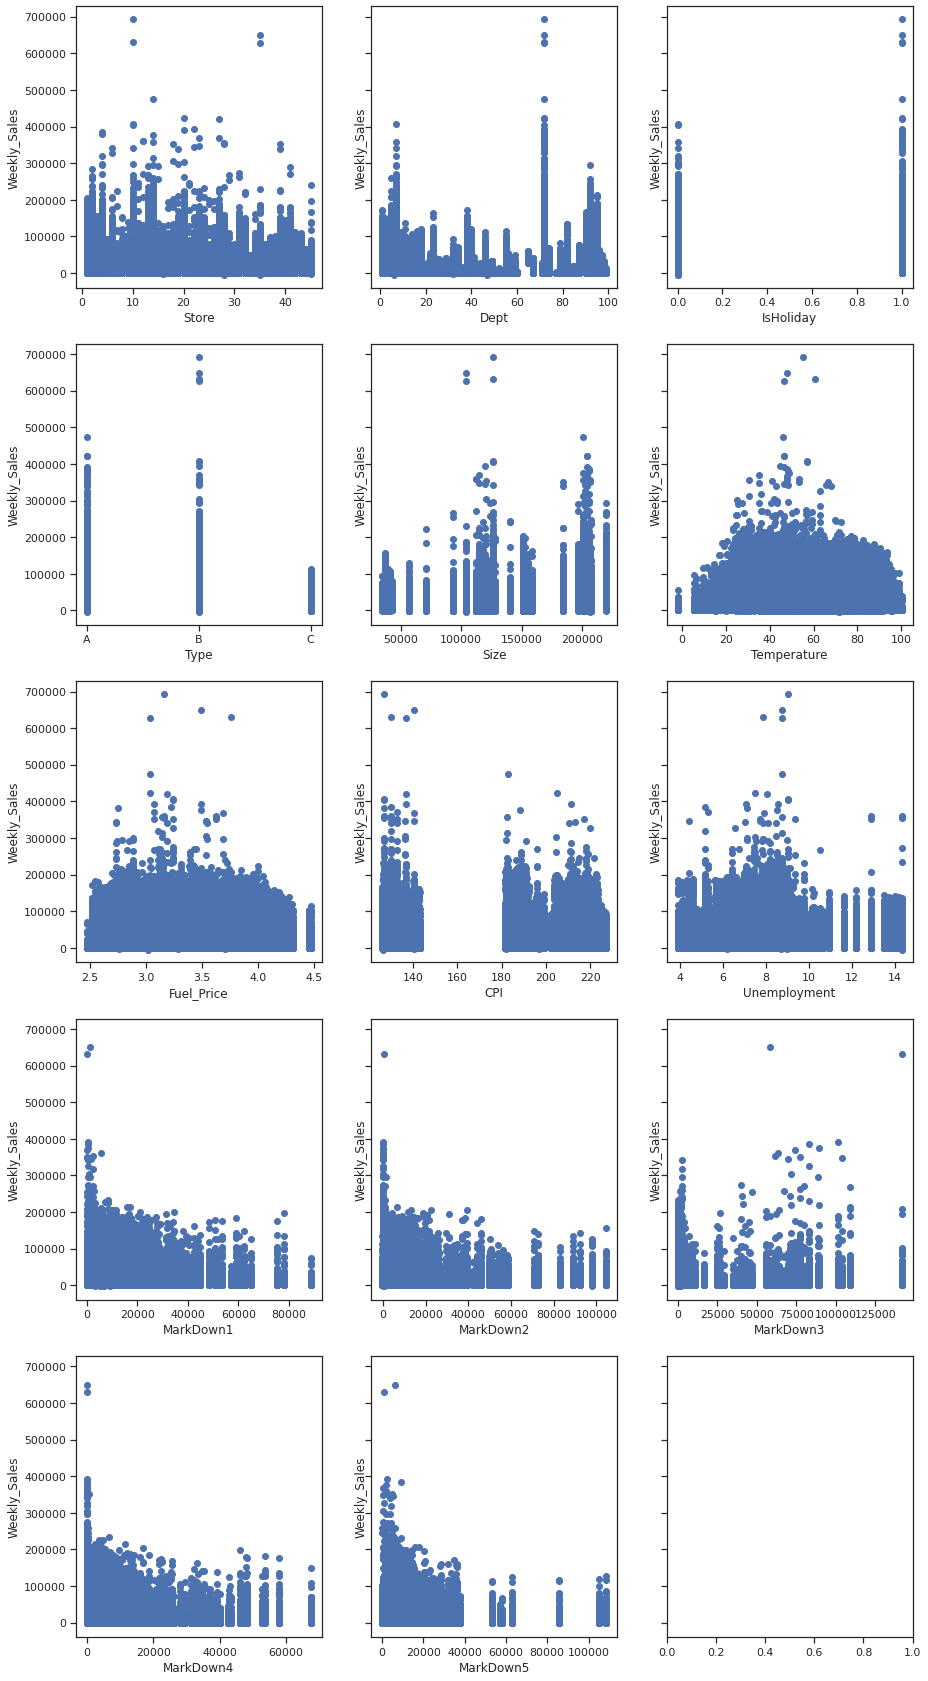

In [ ]:
col_list=['Store', 'Dept', 'IsHoliday', 'Type', 'Size',
          'Temperature', 'Fuel_Price', 'CPI', 'Unemployment','MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5',]
y=trainset['Weekly_Sales'] 
# figsize=(6,3)         
fig, axs = plt.subplots(5, 3, sharey=True,figsize=(15,30))
i=0
j=0
for col in col_list:
  x=trainset[col]
  if j==3:
    i=i+1
    j=0
  axs[i,j].scatter(x,y)
  axs[i,j].set_xlabel(col)
  axs[i,j].set_ylabel('Weekly_Sales')
  j=j+1
 


In [ ]:
############### Exploratory data analysis (EDA): C) Plots for Descriptive Statistics

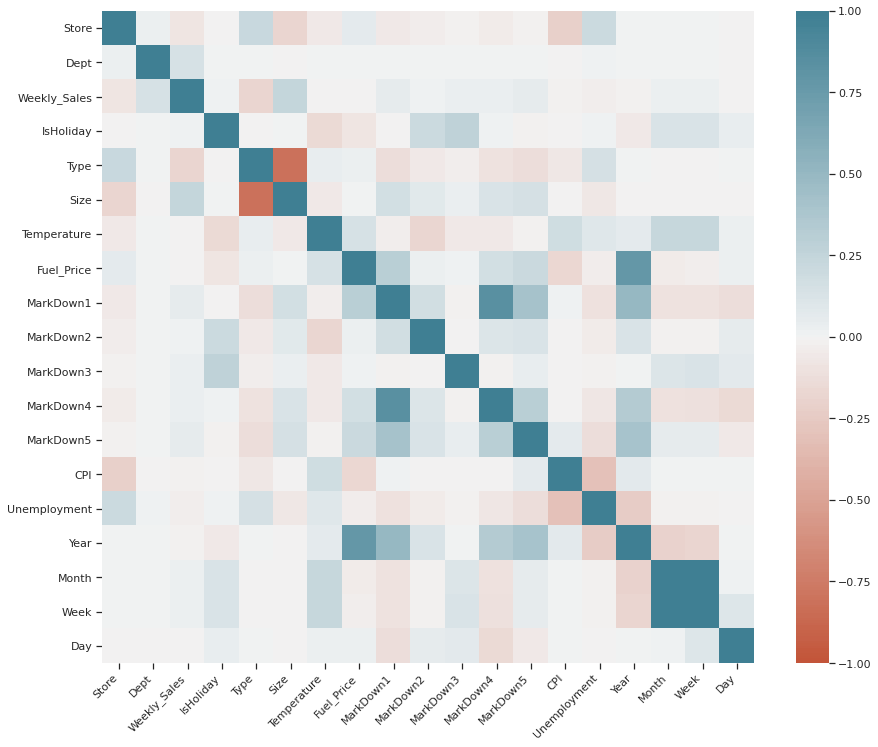

In [ ]:
# heat map of correlation among trainset
fig = plt.figure(figsize=(15, 12))
corr = trainset.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

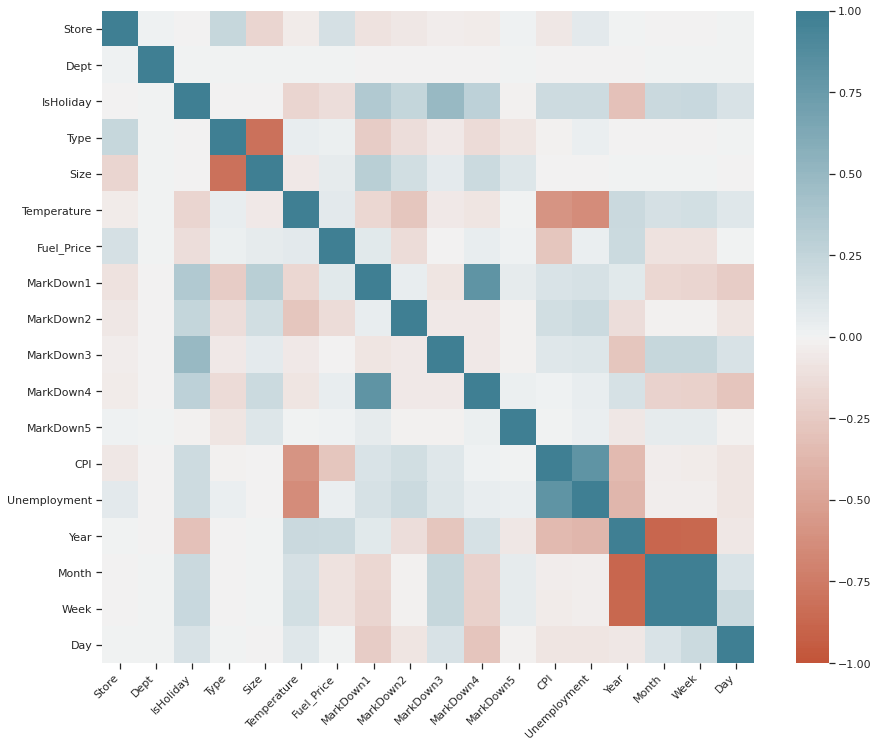

In [ ]:
# heat map of correlation among testset

fig = plt.figure(figsize=(15, 12))
corr = testset.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [ ]:
#################################          Machine learning part        #################################

In [ ]:
################################# modeling data with XGBoost #################################
###  parameters
xgb_params = {'objective': 'reg:linear','booster' : "gbtree",'eval_metric' : 'mae','nthread' : 4,'eta' : 0.05,
          'max_depth' : 13,'min_child_weight' : 43,'gamma' : 10,'subsample' :1.0,'colsample_bytree' : 1.,
          'colsample_bylevel' : 0.5,'alpha' : 0.3,'lambda' : 0,'nrounds' : 1000}
          
dataset=trainset.drop(["Weekly_Sales"], axis=1)
target=trainset['Weekly_Sales']
X_train, X_test, y_train, y_test = train_test_split(dataset,target,test_size=.1, random_state=25)


xgtrain = xgb.DMatrix(X_train.values, label=y_train)
xgtest = xgb.DMatrix(X_test.values,label=y_test)

watchlist = [(xgtrain, 'train'), (xgtest, 'test')]

model= xgb.train(xgbr_params, xgtrain, xgb_params['nrounds'], watchlist, early_stopping_rounds=300, verbose_eval = True)


[16:47:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	train-mae:15204.3	test-mae:15089.2
Multiple eval metrics have been passed: 'test-mae' will be used for early stopping.

Will train until test-mae hasn't improved in 300 rounds.
[1]	train-mae:14464.1	test-mae:14352.3
[2]	train-mae:13771.5	test-mae:13664.9
[3]	train-mae:13096.9	test-mae:12994.4
[4]	train-mae:12482.2	test-mae:12380.1
[5]	train-mae:11908.9	test-mae:11810.4
[6]	train-mae:11331.3	test-mae:11236.5
[7]	train-mae:10867.1	test-mae:10774.7
[8]	train-mae:10377.9	test-mae:10284.6
[9]	train-mae:9896.58	test-mae:9808.02
[10]	train-mae:9496.88	test-mae:9412.1
[11]	train-mae:9099.85	test-mae:9018.42
[12]	train-mae:8749.97	test-mae:8670.96
[13]	train-mae:8407.28	test-mae:8332.17
[14]	train-mae:8026.9	test-mae:7954.46
[15]	train-mae:7660.12	test-mae:7591.52
[16]	train-mae:7319.19	test-mae:7252.89
[17]	train-mae:7010.62	test-mae:6947.15
[18]	train-mae:6783.55	

In [ ]:
### prediction part
column_test_name = []
test_data=testset
for i in range(len(testset.columns)):
    column_test_name.append('f' + str(i))
test_data.columns = column_test_name

xgb_test = xgb.DMatrix(test_data)
xgb_pred  =model.predict(xgb_test)

## save result to csv file
sampleSubmission['weeklySales'] = xgb_pred
sampleSubmission.to_csv('XGBoost_output.csv', index=False)


In [ ]:
################################### Modeling data with Extra Trees Regressor ###################################

In [ ]:
X=trainset.drop(["Weekly_Sales"], axis=1)
y=trainset['Weekly_Sales']
X_train, X_test, Y_train, Y_test = train_test_split(X,y,test_size=.1, random_state=25)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(379413, 13) (42157, 13) (379413,) (42157,)


In [ ]:
extra_forest_regressor = ExtraTreesRegressor(random_state=1).fit(X_train, Y_train)
Y_preds = extra_forest_regressor.predict(X_test)
predict_testset=extra_forest_regressor.predict(testset)
sampleSubmission['weeklySales'] = predict_testset
sampleSubmission.to_csv('TreesRegressor_output.csv', index=False)